# Problem Statement 

#### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)

### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_tc = pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
df_tc.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df1_tc = df_tc[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df1_tc.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
#Shape of the dataset:-
df1_tc.shape

(1436, 9)

#### This dataset have 1436 rows and 9 variables

In [5]:
##Checking datatypes:-
df1_tc.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [6]:
df1_tc.rename(columns = {'Age_08_04':'Age'},inplace=True)

In [7]:
##Statistical description of the data:-
df1_tc.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [8]:
##Checking null values:-
df1_tc.isnull().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

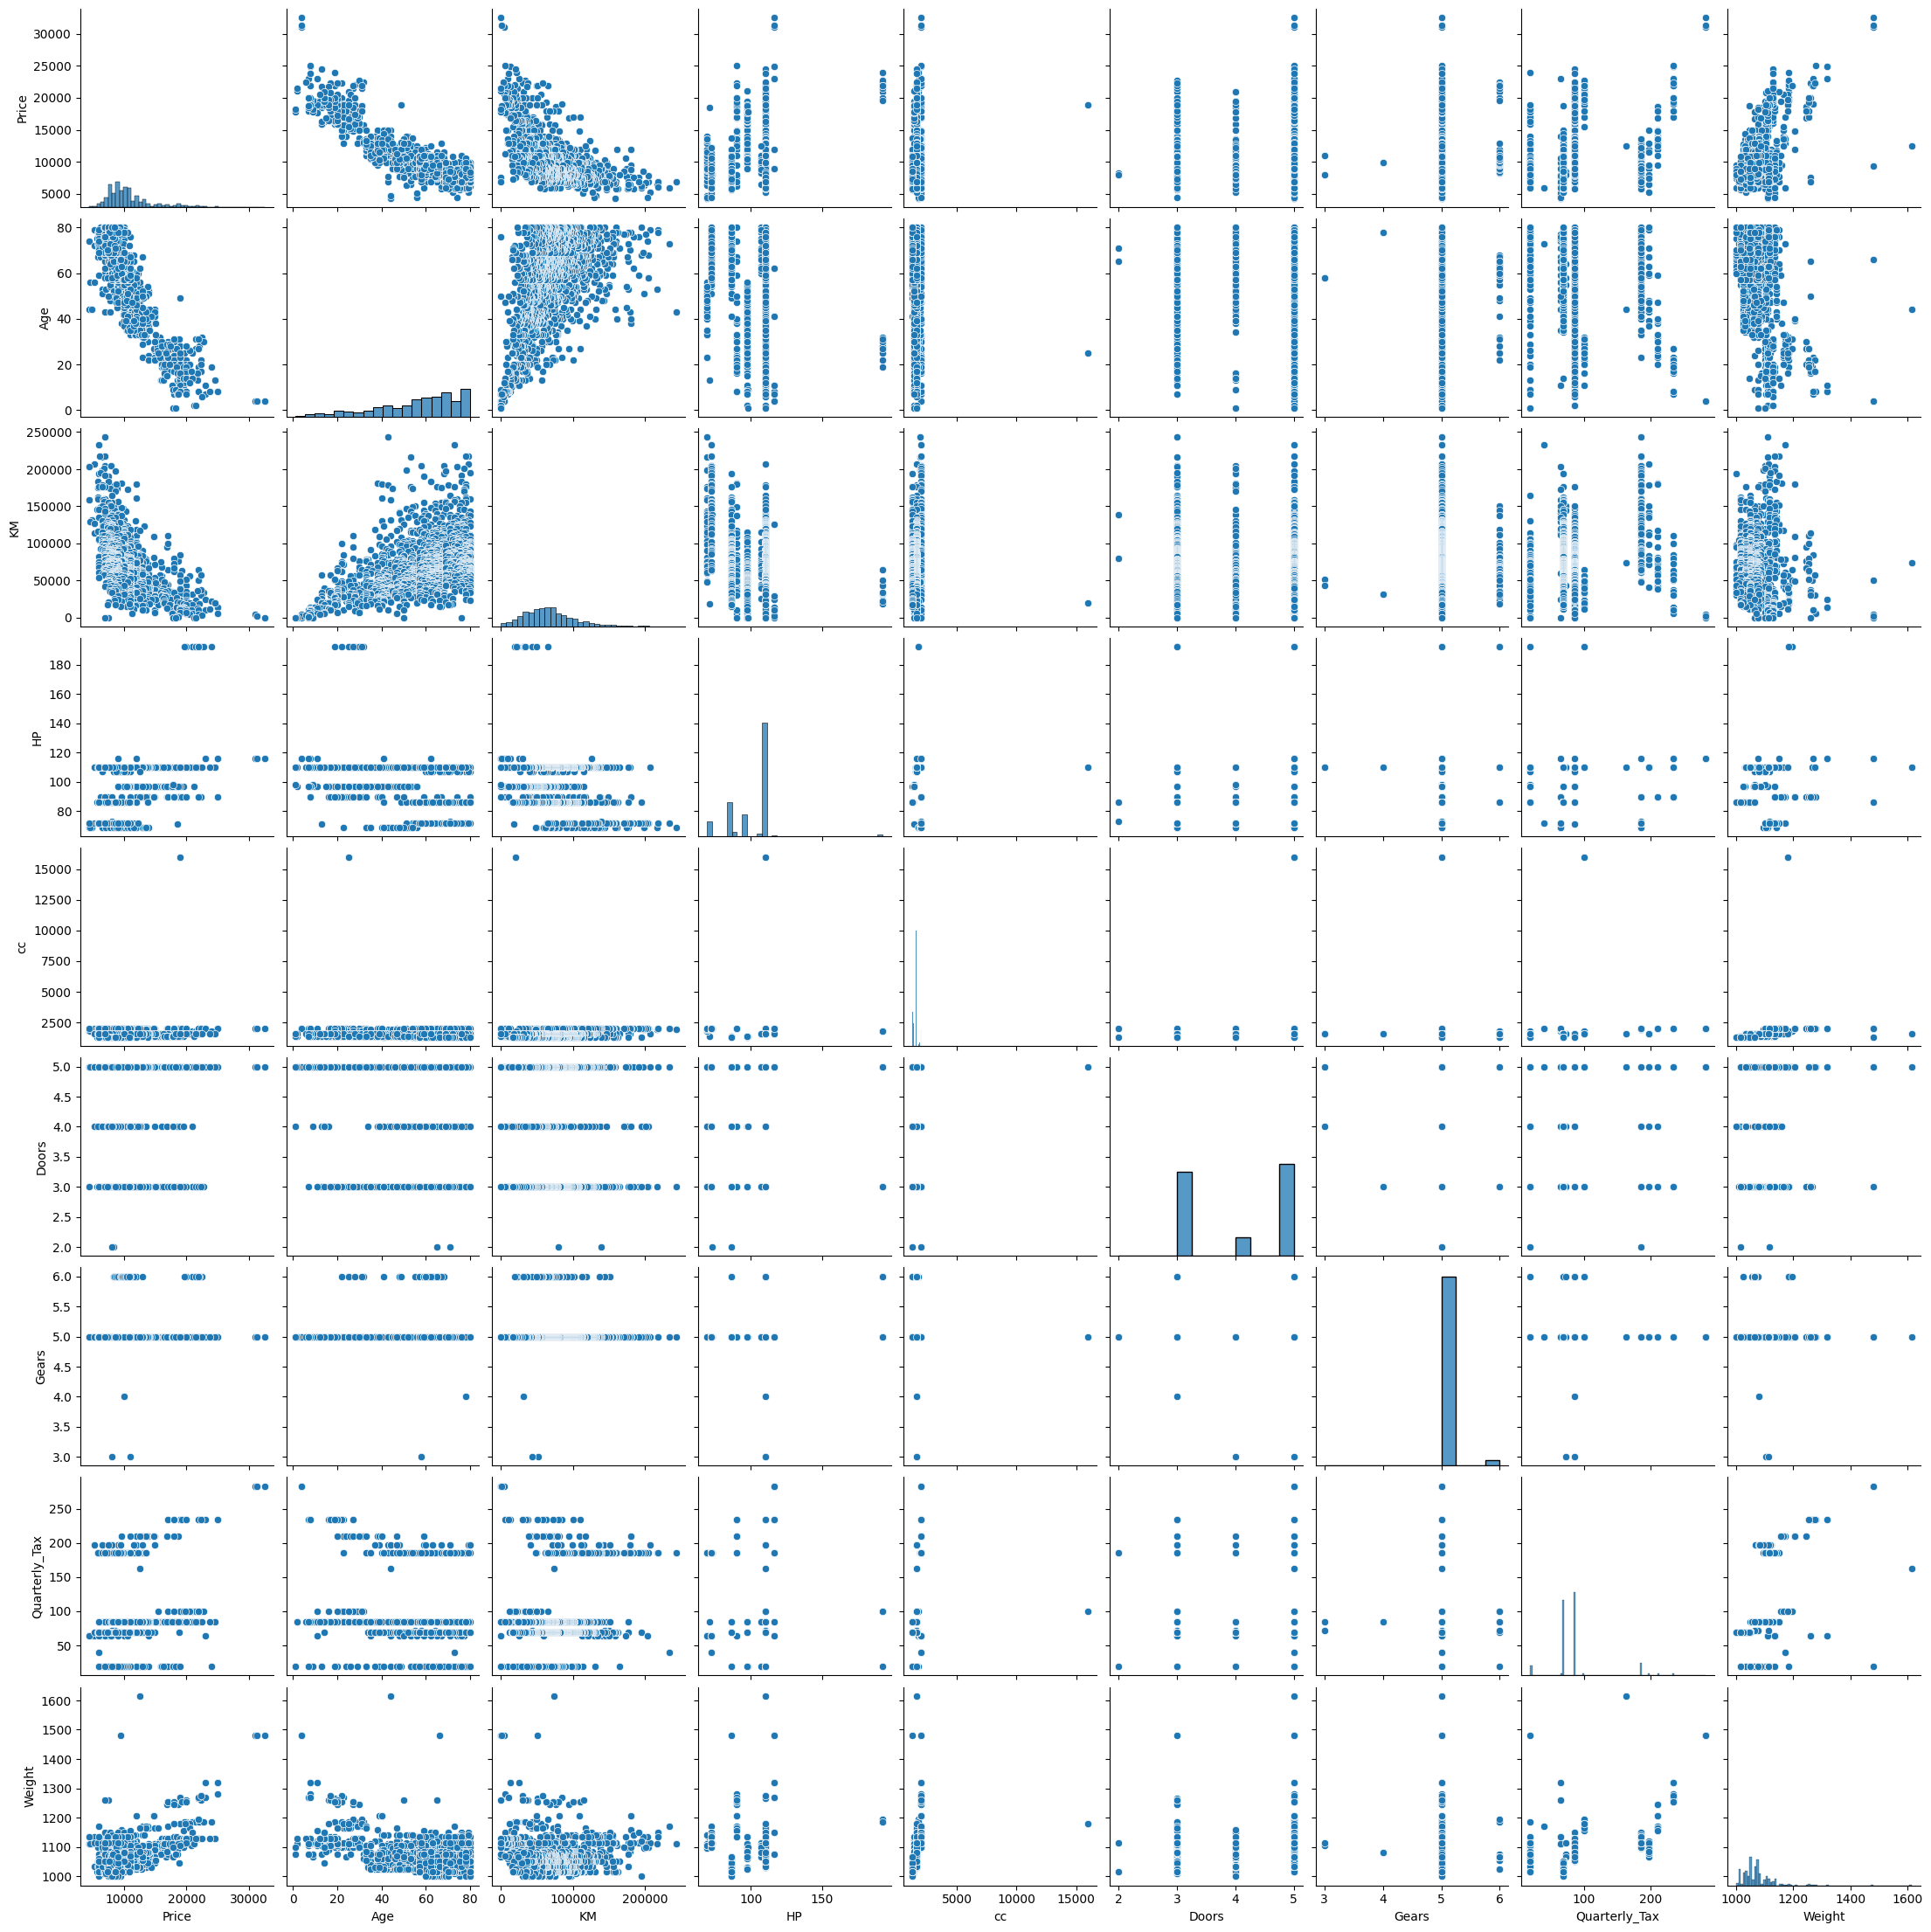

In [9]:
##Distribution of all the variables using pairplot:-
sns.pairplot(df1_tc)

<AxesSubplot: >

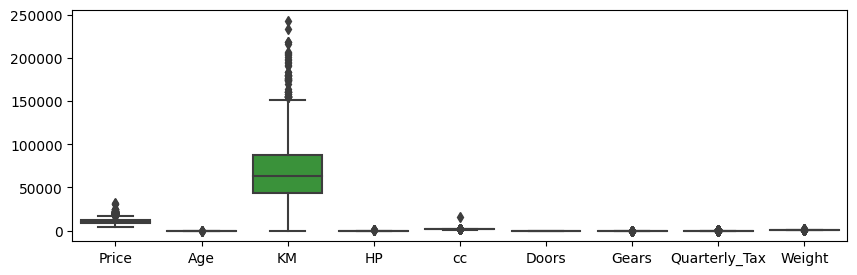

In [10]:
##Checking the outliers:-
plt.figure(figsize=(10,3))
sns.boxplot(data=df1_tc)

In [11]:
#IQR Method used for remove outlier:-

Q1 = df1_tc.quantile(0.25)

Q3 = df1_tc.quantile(0.75)

IQR = Q3 - Q1

df1_tc = df1_tc[~((df1_tc < (Q1 - 1.5 * IQR)) | (df1_tc > (Q3 + 1.5 * IQR))).any(axis=1)]

df1_tc.shape

(1068, 9)

<AxesSubplot: >

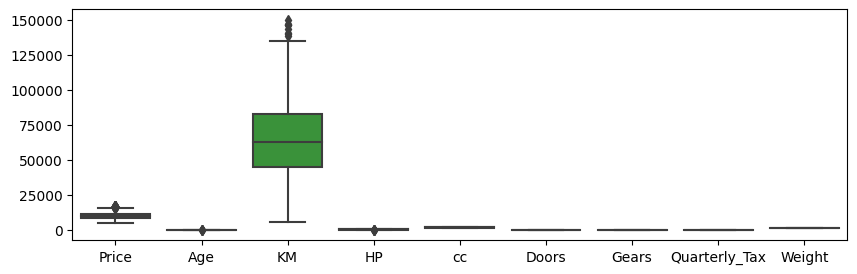

In [12]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df1_tc)

#### After using IQR method we can see that maximum outliers remove from all the variables.

In [13]:
##Checking correlation between both the variables:-
df1_tc.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.864899,-0.542729,0.150470,0.083813,0.172822,NaN,0.404433,0.496719
Age,-0.864899,1.000000,0.488156,-0.057575,-0.022686,-0.097605,NaN,-0.272505,-0.365319
KM,-0.542729,0.488156,1.000000,0.017745,0.101174,0.012241,NaN,-0.110129,-0.086172
HP,0.150470,-0.057575,0.017745,1.000000,0.907076,0.185710,NaN,0.442250,0.507455
cc,0.083813,-0.022686,0.101174,0.907076,1.000000,0.202208,NaN,0.385398,0.556533
Doors,0.172822,-0.097605,0.012241,0.185710,0.202208,1.000000,NaN,0.623416,0.546448
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarterly_Tax,0.404433,-0.272505,-0.110129,0.442250,0.385398,0.623416,NaN,1.000000,0.800215
Weight,0.496719,-0.365319,-0.086172,0.507455,0.556533,0.546448,NaN,0.800215,1.000000


In [14]:
#Remove duplicates from all the dataset:-
df1_tc = df1_tc.drop_duplicates()
df1_tc.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105
22,15950,28,56349,110,1600,3,5,85,1120
23,16950,28,32220,110,1600,3,5,85,1120
24,16250,29,25813,110,1600,3,5,85,1120


<AxesSubplot: >

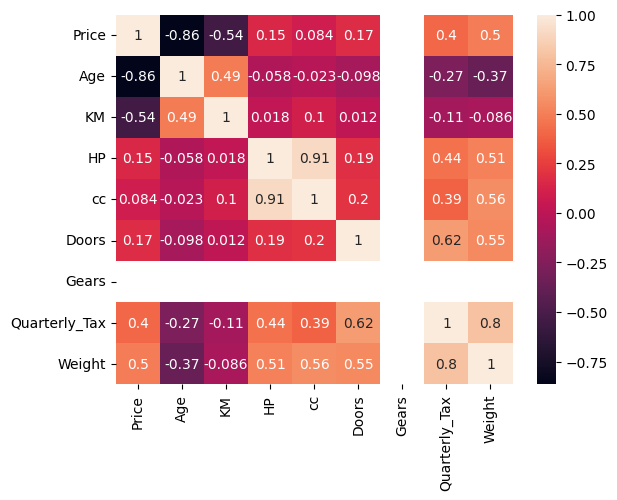

In [15]:
sns.heatmap(df1_tc.corr(),annot=True)

## Model Building

In [16]:
model = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1_tc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     701.5
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:58:07   Log-Likelihood:                -8853.4
No. Observations:                1068   AIC:                         1.772e+04
Df Residuals:                    1060   BIC:                         1.776e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -319.5307     76.343     -4.185      0.000    -469.331    -169.730
Age            -101.3559      2.471    -41.013      0.000    -106.205     -96.507
KM               -0.0140      0.001    -10.913      0.000      -0.017      -0.011
HP               47.6991      7.639      6.244      0.000      32.710      62.689
cc               -4.6695      0.630     -7.418      0.000      -5.905      -3.434
Doors           -89.9535     41.240     -2.181      0.029    -170.875      -9.032
Gears         -1597.6534    381.715     -4.185      0.000   -2346.656    -848.651
Quarterly_Tax    -2.4126      7.215     -0.334      0.738     -16.569      11.744
Weight           26.4782      2.368     11.182      0.000      21.832      31.124
==============================================================================
Omnibus:                       12.696   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.205
Skew:                           0.009   Prob(JB):                     4.10e-05
Kurtosis:                       3.674   Cond. No.                     5.01e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Calculating VIF(Variance Inflation Factor)

In [17]:
rqs_age = smf.ols("Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1_tc).fit().rsquared
vif_age = 1/(1-rqs_age)

rqs_km = smf.ols("KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1_tc).fit().rsquared
vif_km = 1/(1-rqs_km)

rqs_hp = smf.ols("HP~Age+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=df1_tc).fit().rsquared
vif_hp = 1/(1-rqs_hp)

rqs_cc = smf.ols("cc~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=df1_tc).fit().rsquared
vif_cc = 1/(1-rqs_cc)

rqs_Doors = smf.ols("Doors~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=df1_tc).fit().rsquared
vif_Doors = 1/(1-rqs_Doors)

rqs_Gears = smf.ols("Gears~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=df1_tc).fit().rsquared
vif_Gears = 1/(1-rqs_Gears)

rqs_qt = smf.ols("Quarterly_Tax~Age+KM+HP+cc+Doors+Gears+Weight",data=df1_tc).fit().rsquared
vif_qt = 1/(1-rqs_qt)

rqs_wt = smf.ols("Weight~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=df1_tc).fit().rsquared
vif_wt = 1/(1-rqs_wt)

In [18]:
col = {'variables':['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_Doors,vif_Gears,vif_qt,vif_wt]}
vif_frame = pd.DataFrame(col)
vif_frame.style.hide_index()

variables,vif
Age,1.607110
KM,1.374123
HP,6.807655
cc,7.578576
Doors,1.748909
Gears,0.000000
Quarterly_Tax,3.824252
Weight,4.409699


### Test for Normality of residuals

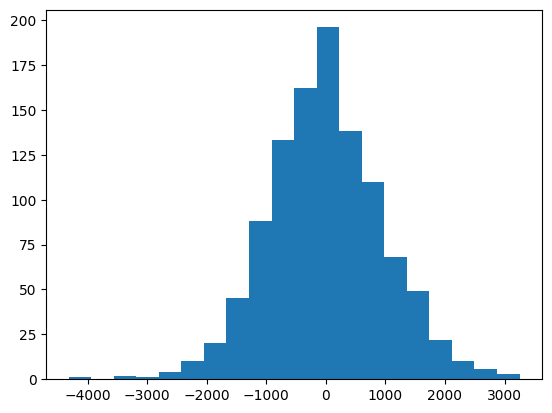

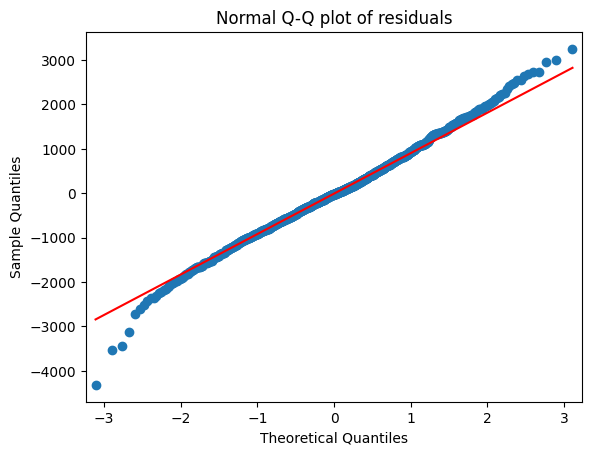

In [20]:
plt.hist(model.resid,bins = 20)
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual plot for homoscedasticity

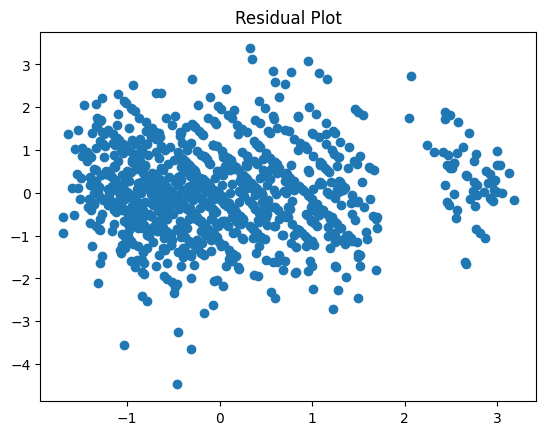

In [21]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.show()

### Residual VS Regressors

eval_env: 1


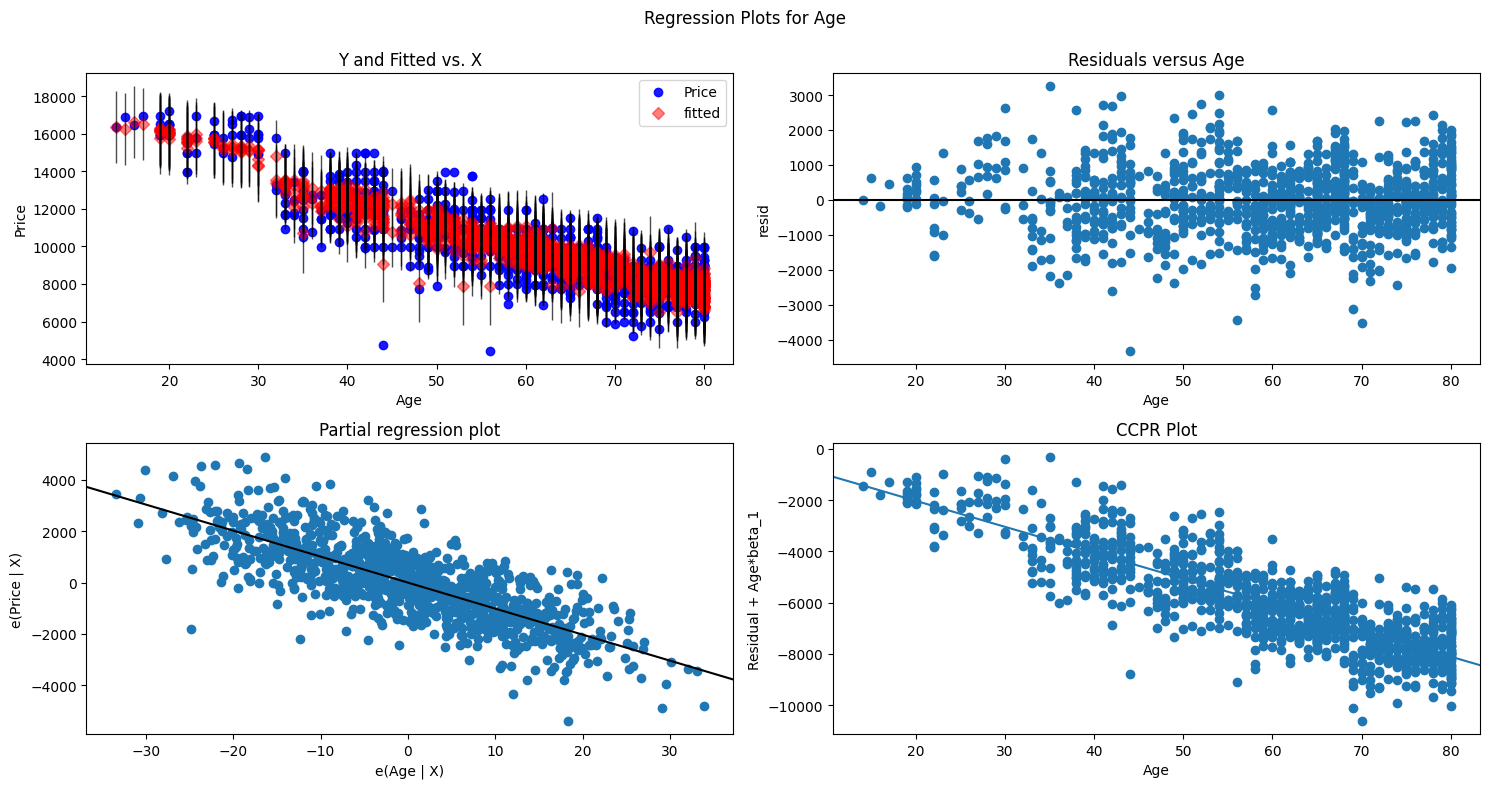

In [22]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

eval_env: 1


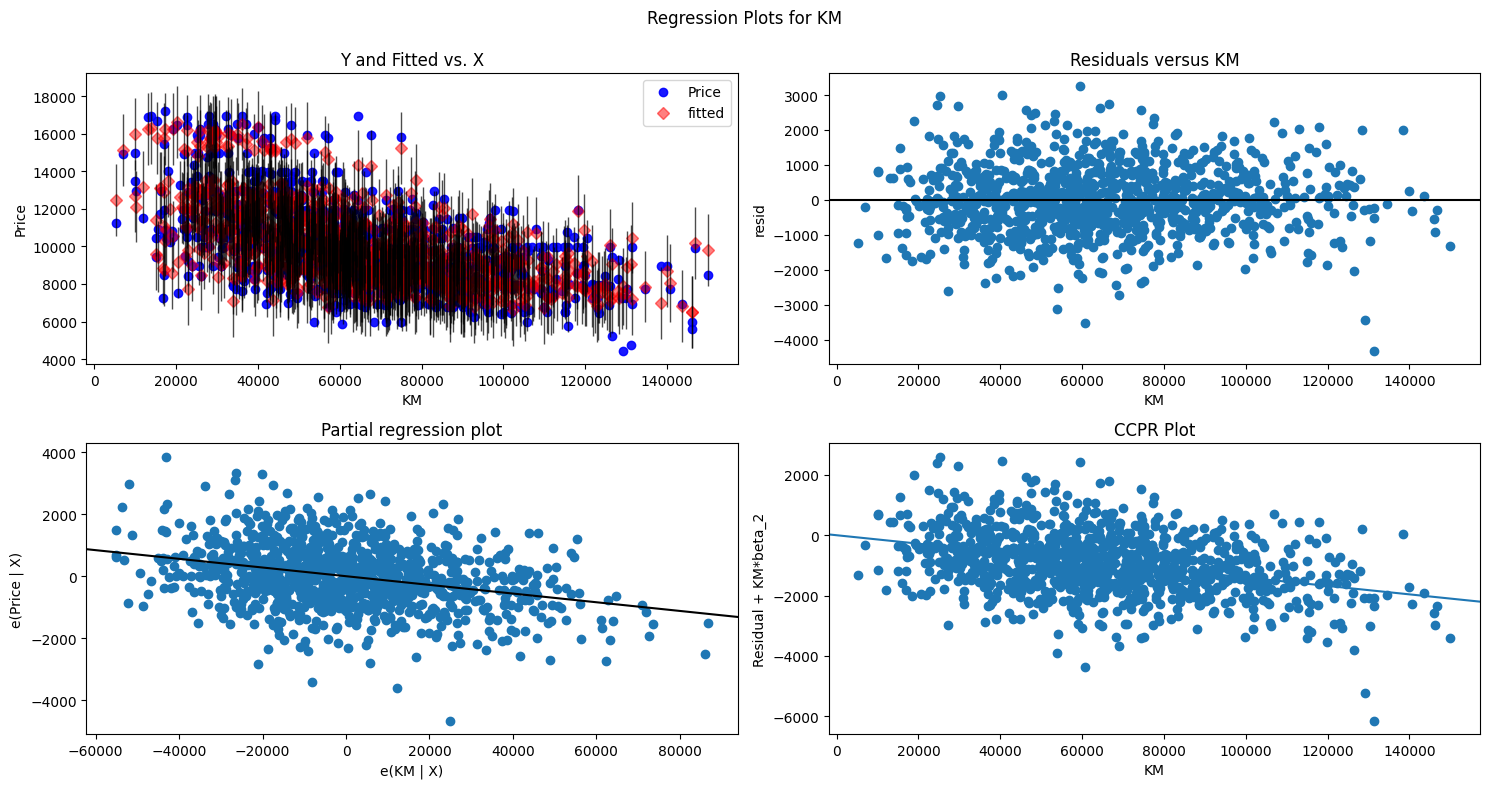

In [23]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

eval_env: 1


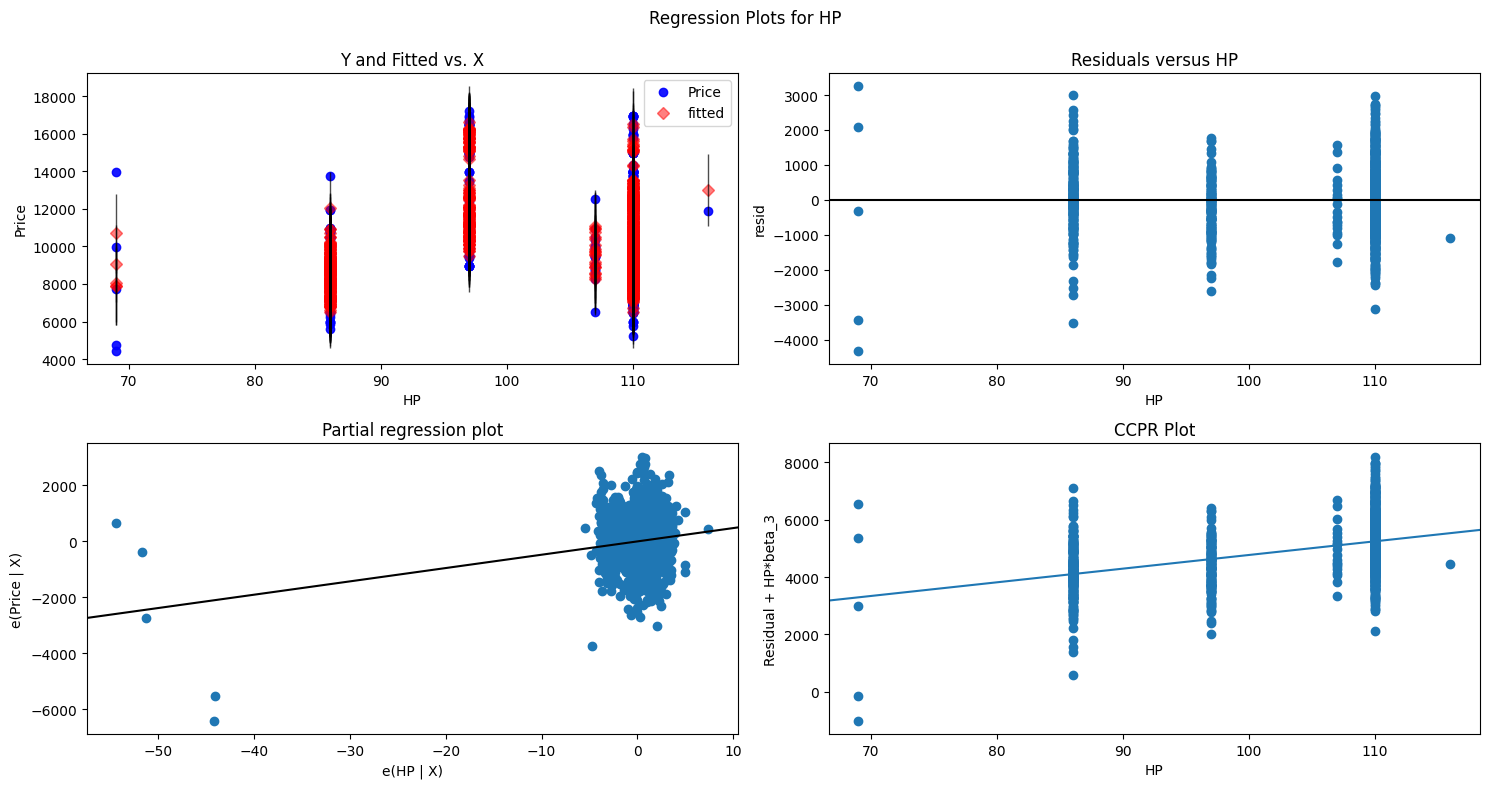

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


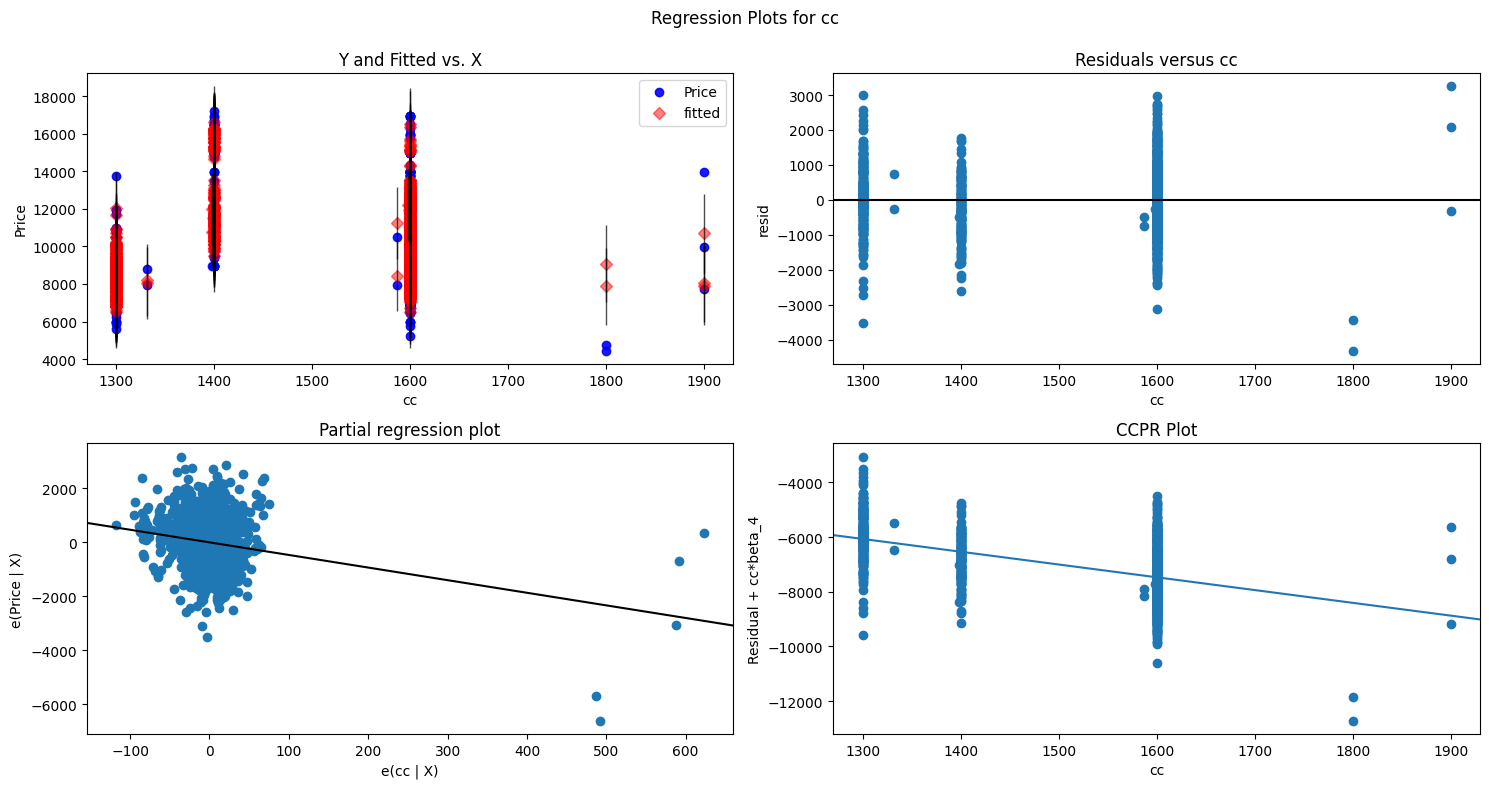

In [25]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

eval_env: 1


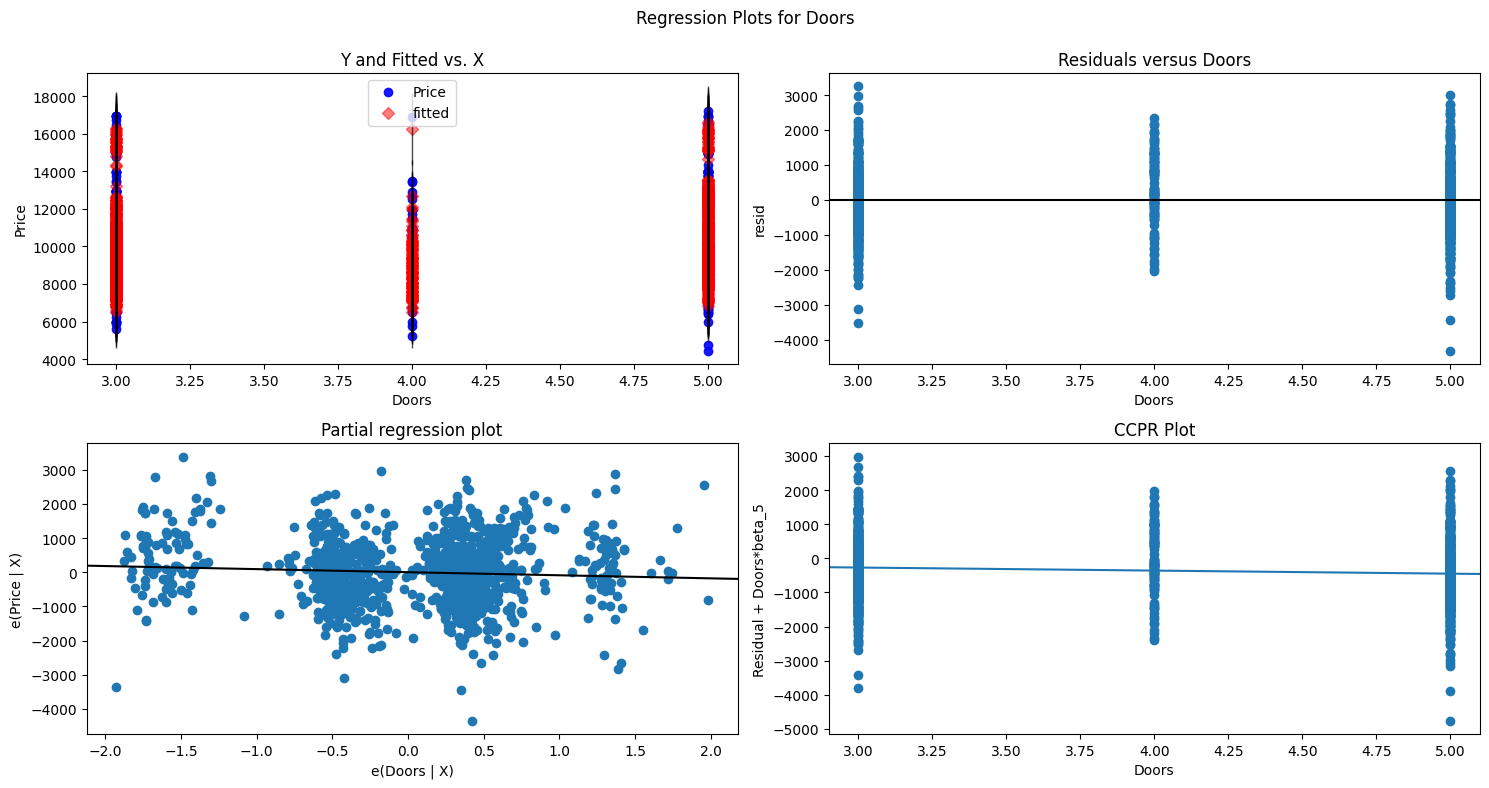

In [26]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

eval_env: 1


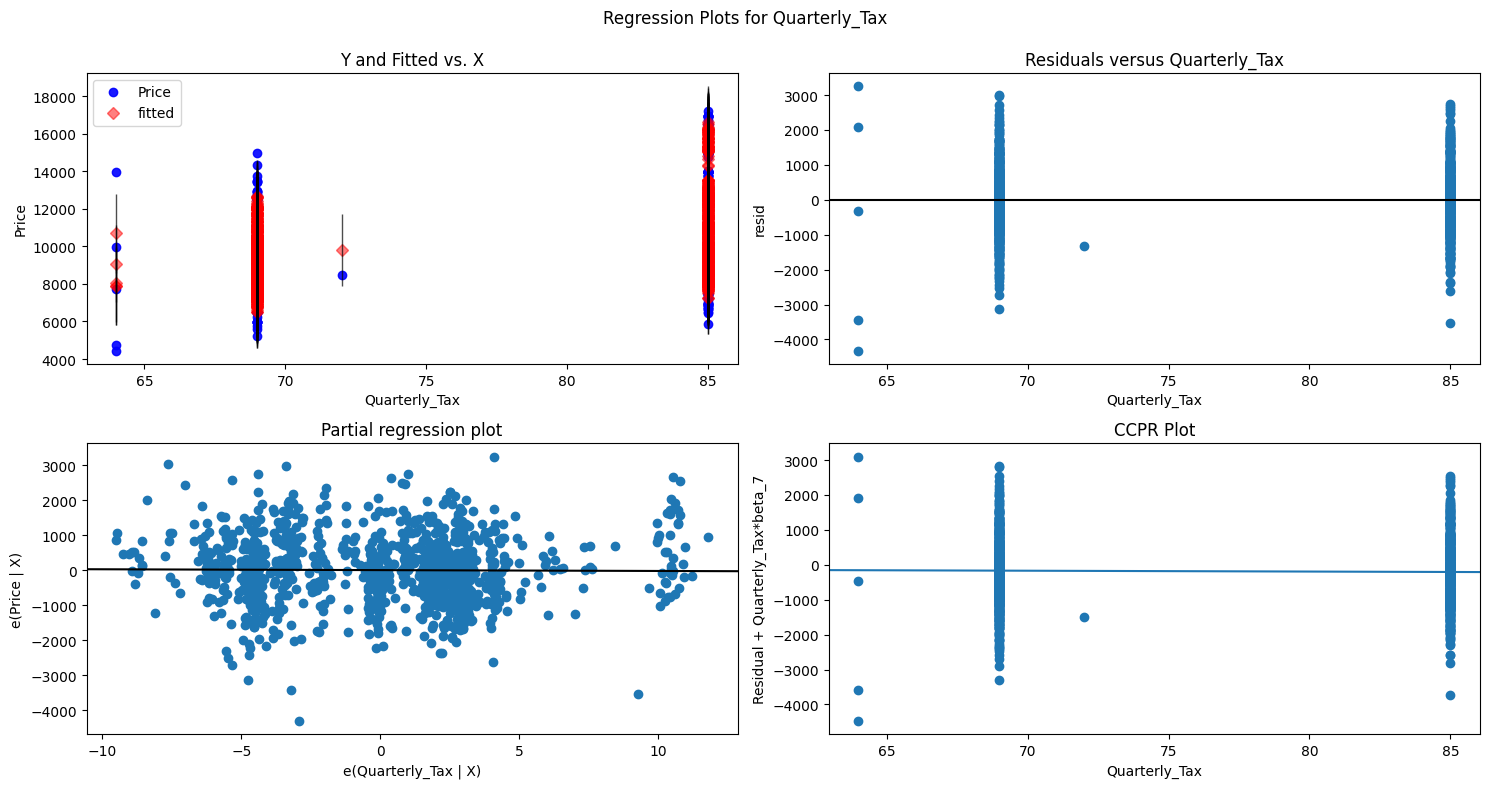

In [27]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

eval_env: 1


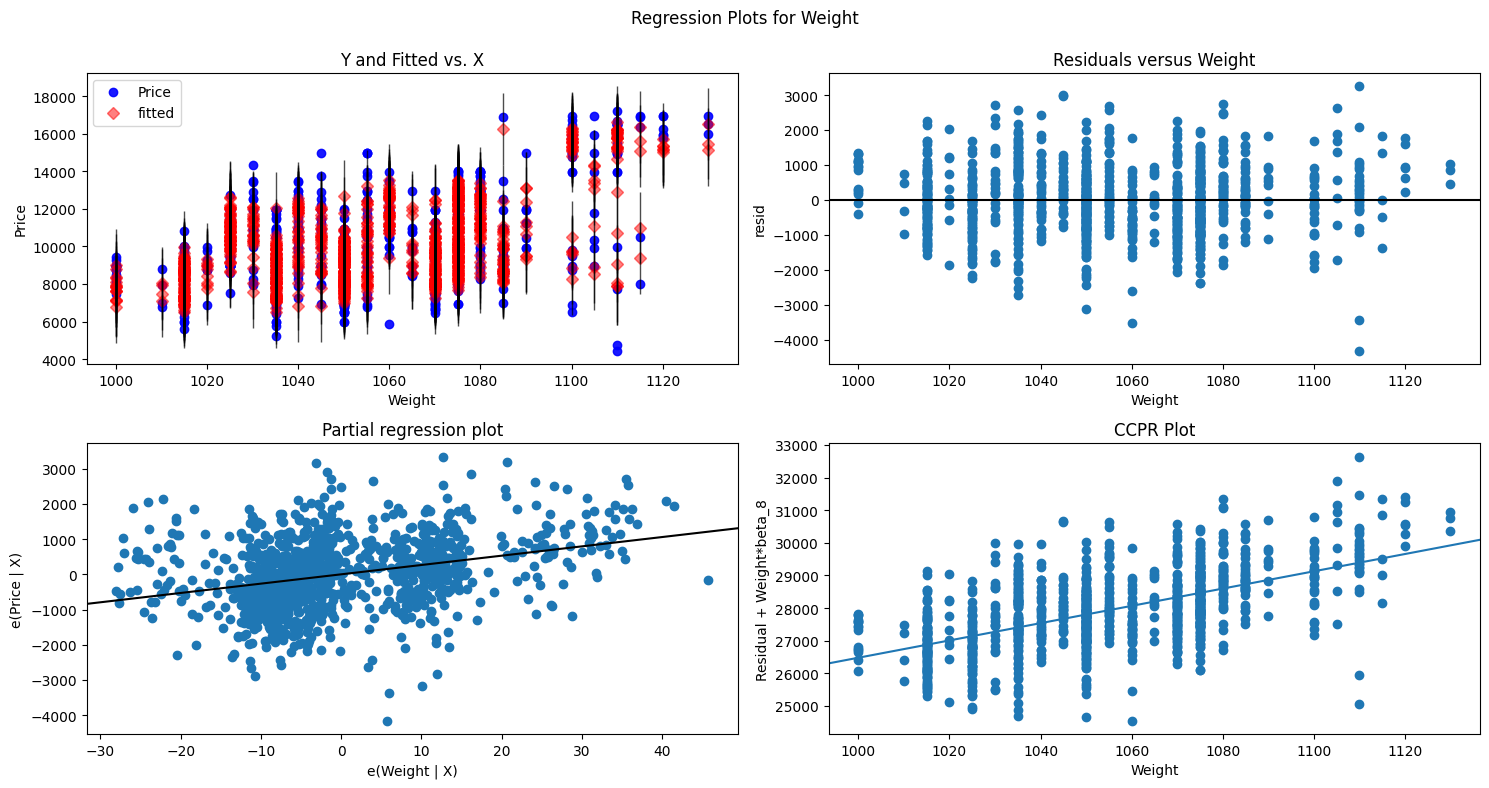

In [28]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

### Cook's Distance

In [29]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
k = 8
n = 1436
3*(k+1)/n

0.018802228412256268

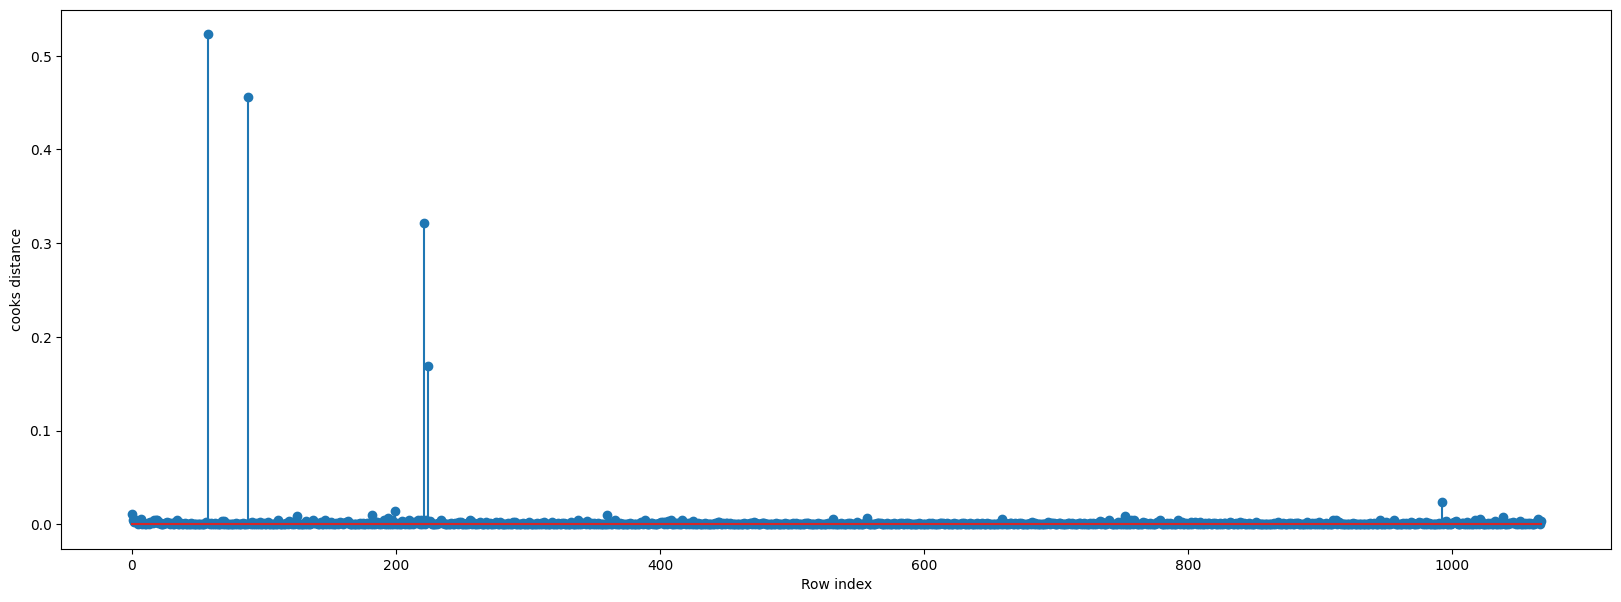

In [30]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1_tc)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [31]:
np.where(c>0.018)

(array([ 58,  88, 221, 224, 992], dtype=int64),)

In [32]:
df1_tc = df1_tc.drop(df1_tc.index[[14,16,49,80,109,110,111,141,191,192,221,
         523,601,654,960,991,1058]],axis = 0).reset_index()

In [33]:
df1_tc.head()

,index,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,19,16950,30,64359,110,1600,3,5,85,1105
1,20,15950,30,67660,110,1600,3,5,85,1105
2,22,15950,28,56349,110,1600,3,5,85,1120
3,23,16950,28,32220,110,1600,3,5,85,1120
4,24,16250,29,25813,110,1600,3,5,85,1120


In [34]:
df1_tc = df1_tc.drop(['index'],axis=1)
df1_tc.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,16950,30,64359,110,1600,3,5,85,1105
1,15950,30,67660,110,1600,3,5,85,1105
2,15950,28,56349,110,1600,3,5,85,1120
3,16950,28,32220,110,1600,3,5,85,1120
4,16250,29,25813,110,1600,3,5,85,1120


### Build Model

In [35]:
final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df1_tc).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     688.4
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:03:45   Log-Likelihood:                -8705.3
No. Observations:                1051   AIC:                         1.743e+04
Df Residuals:                    1043   BIC:                         1.747e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -338.3901     76.699     -4.412      0.000    -488.891    -187.889
Age            -101.4818      2.478    -40.961      0.000    -106.343     -96.620
KM               -0.0141      0.001    -11.043      0.000      -0.017      -0.012
HP               36.0174      8.125      4.433      0.000      20.073      51.961
cc               -3.8745      0.664     -5.832      0.000      -5.178      -2.571
Doors           -95.0274     41.381     -2.296      0.022    -176.227     -13.828
Gears         -1691.9506    383.493     -4.412      0.000   -2444.457    -939.444
Quarterly_Tax    -1.8261      7.198     -0.254      0.800     -15.949      12.297
Weight           26.9419      2.380     11.321      0.000      22.272      31.612
==============================================================================
Omnibus:                       15.787   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.214
Skew:                          -0.020   Prob(JB):                     1.23e-06
Kurtosis:                       3.787   Cond. No.                     2.23e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
round(final_model.predict(df1_tc[['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax','Weight']]),2)

0       14342.06
1       14295.46
2       15062.23
3       15402.86
4       15391.82
          ...   
1046     7754.21
1047     9174.60
1048     8622.54
1049     8752.03
1050     8854.92
Length: 1051, dtype: float64